## RNN

* 시간적으로 연속되는 데이터를 다루기 위한 신경망
* 연속되는 데이터들의 예제
* 판매량
* 음성, 음악
* 이동 궤적


### Recurrent Neuron

* [1,2,3,4,5,6] 에서 [2,3,4,5,6,7]을 예측할 수 있는가?
* Recurrent Neuron - output을 그 자신에 돌려보내는 뉴런
* t-1 시점의 뉴런 output이 t 시점에 뉴런에 들어가는 input 과 함께 feed
* 이렇게 이전 step의 input이 추가되는 cell은 memory cell 이라고 불림
* Recurrent 뉴런의 원리는 Layer 단위로도 적용 가능하여, 레이어의 단일 output을 해당 레이어의 각 노드의 input으로 돌려보낼 수 있음

### RNN의 활용
* 입력값과 출력값의 설정에 따라 여러 가지 상황에서 적용
1. 다수 입력 단일 출력 구조 : 문장의 뜻을 읽고 파악
- '밥은 + '먹고' + '다니니' => 안부인사
2. 단일 입력 다수 출력 구조 : 사진 캡션
- '바퀴' + '직육면체' + '번호' => 버스
3. 다수 일벽 다수 출력 구조 : 문장 번역
- '예' + '그게' + '다에요' => Yes, that's all.

### Basic RNN의 단점
* 만약 t 시점에서 바로 전인 t-1 시점의 output만 적용할 수 있다면 long term memory가 존재할 수 없음
* 결과값 기울기가 0이 되어버리는 vanishing gradient 문제도 존재
* 활성화함수의 조정(Relu, Leaky Relu)나 정규화를 쓸 수도 있지만, time series input을 다루는 RNN의 특성상 학습이 너무 느려질 수 있음
* 예측에 쓰일 time step을 줄일 수도 있지만 이 때는 장기적 예측이 힘들어짐

### LSTM cell
* 1. Cell state
-  정보가 바뀌지 않고 기억,흐름
* 2. Forget gate
- cell state에서 sigmoid layer를 거쳐 어떤 정보를 버릴지 정함
* 3. Input gate
- 새로운 정보 중 어떤 것을 cell state에 저장할지 정함
- sigmoid layer를 거쳐 어떤 값을 업데이트할지 정하고 tanh layer에서 새로운 후보 vector를 만듬
* 4. Cell state update
- 이전 gate에서 정해진 버릴 정보와 업데이트할 정보를 

### sine wave에 대한 RNN 적용
* 임의의 sine 그래프를 생성하고 train_set 과 test_set으로 나누기
* train_set을 기반으로 예측한 그래프의 파형이 test_set과 얼마나 일치하는가


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,50,501)

In [3]:
# x

In [4]:
y = np.sin(x)

In [5]:
# y

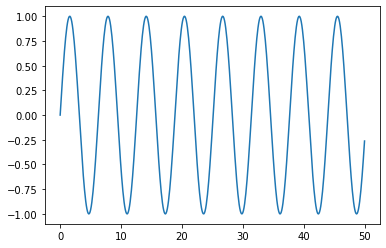

In [6]:
plt.plot(x,y)

In [7]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [8]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [9]:
test_percent = 0.1   # 1/10 테스트 셋

In [10]:
len(df)*test_percent

50.1

In [11]:
test_point = np.round(len(df)*test_percent)  # 

In [12]:
test_point

50.0

In [13]:
test_ind = int(len(df)-test_point)

In [14]:
test_ind

451

In [15]:
train = df.iloc[:test_ind] # 451 rows

In [16]:
test = df.iloc[test_ind:] # 50 rows

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [19]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [20]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
length = 4
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train,
                               length = length, batch_size = batch_size)

In [22]:
len(generator)

447

In [23]:
X,y = generator[0]

In [24]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041]]])

In [25]:
y

array([[0.69470985]])

<AxesSubplot:>

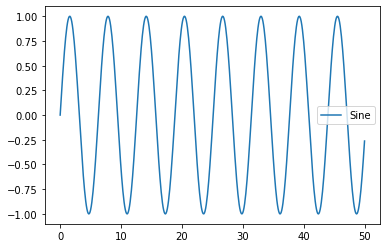

In [26]:
df.plot()

In [27]:
length = 50
bach_size = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size = batch_size)

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from keras import layers

In [29]:
n_features = 1  # x -> y 예측용 one feature input

In [30]:
intro = keras.Input(shape=(length, n_features))
x1 = layers.SimpleRNN(50)(intro)
outro = layers.Dense(1)(x1)

model = keras.Model(inputs = intro, outputs = outro)
model.compile(optimizer = 'adam', loss = 'mse')

In [31]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(generator, epochs=5)

Epoch 1/5
401/401 [==============================] - 16s 35ms/step - loss: 0.0046
Epoch 2/5
401/401 [==============================] - 15s 37ms/step - loss: 7.6344e-05
Epoch 3/5
401/401 [==============================] - 15s 36ms/step - loss: 3.2548e-05
Epoch 4/5
401/401 [==============================] - 15s 37ms/step - loss: 1.5995e-04
Epoch 5/5
401/401 [==============================] - 14s 36ms/step - loss: 2.6175e-04


In [33]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

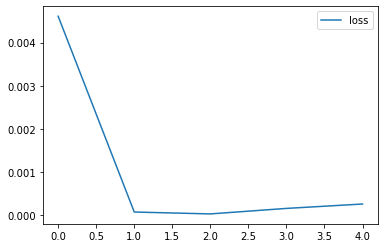

In [34]:
losses.plot()

In [35]:
first_eval_batch = scaled_train[-length:]
first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [36]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 205ms/step


array([[0.9516328]], dtype=float32)

In [37]:
scaled_test[0]

array([0.94955134])

In [38]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)

1/1 [==============================] - 0s 31ms/step


In [39]:
# predicted_value = [[[99]]]
# np.append(current_batch[:,1:,:], predicted_value, axis=1)

In [40]:
true_predictions = scaler.inverse_transform(test_predictions)

In [41]:
test['Predictions'] = true_predictions

C:\Users\user\AppData\Local\Temp/ipykernel_10792/4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:>

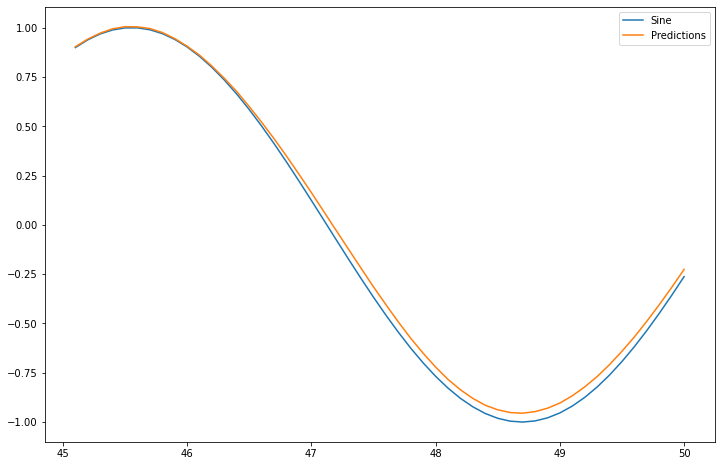

In [42]:
test.plot(figsize = (12,8))

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
early_stop = EarlyStopping(monitor = 'val_loss', patience=2)

In [45]:
length = 49
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size = 1)

In [46]:
intro = keras.Input(shape=(length, n_features))
x1 = layers.LSTM(50)(intro)
outro = layers.Dense(1)(x1)

model = keras.Model(inputs = intro, outputs = outro)
model.compile(optimizer = 'adam', loss = 'mse')

In [47]:
model.fit(generator, epochs= 20, validation_data = validation_generator, callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 9s 10ms/step - loss: 0.0169 - val_loss: 1.2213e-04
Epoch 2/20
402/402 [==============================] - 3s 8ms/step - loss: 8.5079e-05 - val_loss: 5.3544e-05
Epoch 3/20
402/402 [==============================] - 4s 9ms/step - loss: 1.9893e-04 - val_loss: 8.3546e-06
Epoch 4/20
402/402 [==============================] - 4s 9ms/step - loss: 1.7529e-04 - val_loss: 1.7636e-06
Epoch 5/20
402/402 [==============================] - 4s 9ms/step - loss: 4.3598e-04 - val_loss: 8.1638e-06
Epoch 6/20
402/402 [==============================] - 3s 8ms/step - loss: 7.5010e-05 - val_loss: 1.2068e-06
Epoch 7/20
402/402 [==============================] - 3s 8ms/step - loss: 7.9169e-05 - val_loss: 1.7670e-06
Epoch 8/20
402/402 [==============================] - 3s 9ms/step - loss: 8.0780e-05 - val_loss: 1.1549e-05


In [48]:
true_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    true_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)

1/1 [==============================] - 0s 27ms/step


C:\Users\user\AppData\Local\Temp/ipykernel_10792/2642922961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM_Predictions'] = true_predictions


<AxesSubplot:>

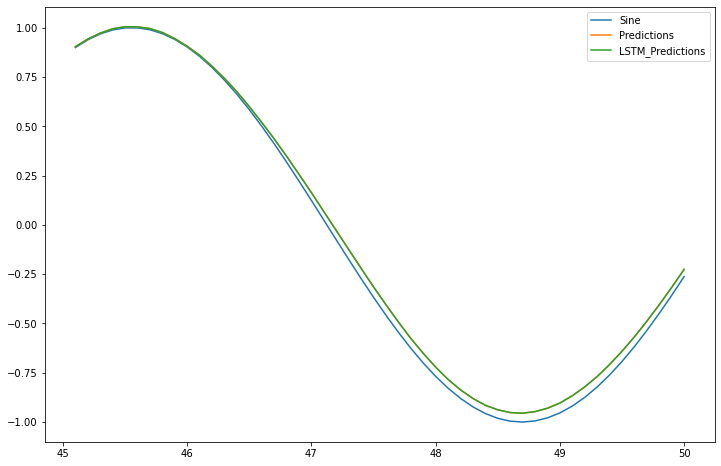

In [49]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM_Predictions'] = true_predictions
test.plot(figsize = (12,8))

<AxesSubplot:>

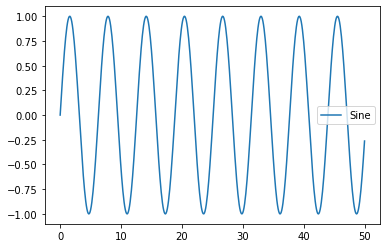

In [50]:
df.plot()

In [51]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [52]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [53]:
intro = keras.Input(shape=(length, n_features))
x1 = layers.LSTM(50)(intro)
outro = layers.Dense(1)(x1)

model = keras.Model(inputs = intro, outputs = outro)
model.compile(optimizer = 'adam', loss = 'mse')

In [54]:
model.fit(generator, epochs=6)

Epoch 1/6
402/402 [==============================] - 5s 8ms/step - loss: 0.0076
Epoch 2/6
402/402 [==============================] - 3s 7ms/step - loss: 1.5037e-04
Epoch 3/6
402/402 [==============================] - 3s 7ms/step - loss: 2.5640e-04
Epoch 4/6
402/402 [==============================] - 3s 8ms/step - loss: 1.8067e-04
Epoch 5/6
402/402 [==============================] - 3s 8ms/step - loss: 5.6832e-05
Epoch 6/6
402/402 [==============================] - 3s 7ms/step - loss: 2.1081e-04


In [55]:
forecast = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(25):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)

1/1 [==============================] - 0s 38ms/step


In [57]:
forecast = scaler.inverse_transform(forecast)

In [58]:
forecast

array([[ 0.91315155],
       [ 0.95173201],
       [ 0.98096619],
       [ 1.00045508],
       [ 1.00991331],
       [ 1.00941502],
       [ 0.99875302],
       [ 0.9783647 ],
       [ 0.94831121],
       [ 0.909036  ],
       [ 0.86087523],
       [ 0.8043749 ],
       [ 0.73994684],
       [ 0.66820155],
       [ 0.58949496],
       [ 0.50474797],
       [ 0.4146155 ],
       [ 0.31967501],
       [ 0.2208116 ],
       [ 0.11885271],
       [ 0.01463245],
       [-0.09087873],
       [-0.19662201],
       [-0.30150841],
       [-0.40450483]])

In [ ]:
25*0.1

In [59]:
forecast_index = np.arange(50.1, 52.6, step=0.1)

In [60]:
len(forecast_index)

25

In [61]:
len(forecast)

25

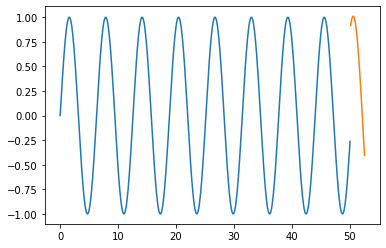

In [62]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index, forecast)